
# Projekt *Learning und Softcomputing* - Sommersemester 2023
## Vorhersage von Flugpreisen 
**Gruppe 04**
- Marisa Sophie Heinemann (DSAI 105714)
- Timo Kranz (ITS 105862)

**Daten**

Der Datensatz verfügt über Daten für One-Way Flüge, die zwischen dem 16.04.2022 und dem 05.10.2022 auf Expedia gefunden wurden. Bereitgestellt wurde dieser von *Dillon Wong* auf [Kaggle](https://www.kaggle.com/datasets/dilwong/flightprices) sowie auf [GitHub](https://github.com/dilwong/FlightPrices). Eine weitere Beschreibung zu diesem finden Sie unter dem Punkt *2. Beschreibung Datensatzes*.

**Aufgabenbeschreibung**

Ziel des zu entwickelnden Modelles ist es auf Basis von verschiedenen Parametern einen Flugpreis vorherzusagen. 

**Aufbau dieses Notebooks**
1. Hinweise zur Durchführung des Projektes
2. Beschreibung des Datensatzes
3. Benötigte Pakete
4. Feature Engineering
5. Exploritory Data Analysis

## 1. Hinweise zur Durchführung des Projektes

Die praktische Übung zum Thema Maschine Learning kann mit [Jupyter Notebook](http://jupyter.org/) und [Scikit-Learn](http://scikit-learn.org/) durchgeführt werden. Wir verwenden die Google-Plattform [Colab](https://colab.research.google.com), die Jupyter Notebooks in der Cloud hostet. Dafür haben wir uns ein gemeinsames Konto angelegt. Dies ist allerdings keine Voraussetzung, da wir auch mit unterschiedlichen Konten gemeinsam an diesem Projekt arbeiten können. 


### Environment
Sollte eine lokale Nuzung auf dem Computer gewünscht sein, um eine Berechnung ohne Netzzugang durchzuführen. Geht dies am besten über die Distribution Miniconda. (Mini)conda ist der Package Manager von Anaconda und ist somit eine Konsolen Applikation. Anaconda ist eine visuelles Front-End für (mini)conda. (Mini/Ana)Conda erlaubt uns die gleiche Umgebung auf jedem Rechner zu erstellen. Wir haben uns für Conda entschieden, da dieses eines der am meisten verwendeten Package Management Systems für Data Science und Machine Learning ist.  Für die Intstallation siehe die offizielle Website von [Miniaconda](https://docs.conda.io/en/latest/miniconda.html). Für die Erstellung der Enviroment haben wir eine .yml-Datei mit einer Liste aller benötigten Packages erstellt. Dieses finden Sie im [Moodle](https://lms.fh-wedel.de/course/view.php?id=207). Speichern Sie diese Datei auf Ihrem Rechner unter den Namen 'learning_env.yml' ab.
Öffne Sie an dem Ort wo die Datei liegt eine Konsole. Um das Enviorment zu erstellen führen Sie folgenden Link aus:

-  *conda env create -f learning_env.yml*

Die Erstellung kann einige Minuten dauern. Aktivieren Sie anschließend das Enviroment in der Konsole.


- *conda activate learning_env*

learning_env steht hier für den in unserem Enviorment verwendetetn Namen in der ersten Zeile und nicht für den Datei Namen. Gehen Sie deshalb sicher, dass Sie nichts an der Datei verändert haben.
Anschließend kann das Python Skript lokal durchgeführt werden.

# Todo Link von Moodle
Dieses Jupyter-Notebook finden Sie im [Moodle](https://lms.fh-wedel.de/course/view.php?id=207). 


Starten Sie dazu bitte [Colab](https://colab.research.google.com), in dem Sie mit dem Web-Browser auf https://colab.research.google.com gehen, wählen Sie dann *Upload Notebook* aus dem *File*-Menü und laden Sie bitte das File  *projekt_learning_und_softcomputing_gruppe04.ipynb* hoch. Um das Notebook sinvoll verwenden zu können ist es nötig die Daten im Drive abzulegen.


## 2. Beschreibung des Datensatzes 

Der Datensatz enthält Informationen zu One-Way-Flügen, die zwischen dem *16.04.2022* und *05.10.2022* auf Expedia verfügbar waren. Er besteht aus *27 verschiedenen Featuren* und umfasst insgesamt *5.999.739 Datenpunkte*.
Jede Zeile stellt einen Datensatz für einen auf Expedia gefundenen Flug dar. Ein und derselbe Flug kann in mehreren Zeilen erscheinen, da sich der Preis täglich ändern kann.
Ingesammt umfasst der Datensatz eine 30 GB CSV-Datei. Zu beachten ist, dass der Datensatz ausschließlich Flüge zu und von US-Flughäfen umfasst. Diese enthaltenden Flughäfen haben folgende Kürzel:  ATL, DFW, DEN, ORD, LAX, CLT, MIA, JFK, EWR, SFO, DTW, BOS, PHL, LGA, IAD, OAK


Die Fetures werden in der folgenden Tabelle näher beschrieben.	 


| Feature                               | Beschreibung                                                                                   |
|---------------------------------------|-----------------------------------------------------------------------------------------------|
| legId                                 | Eine Kennung für den Flug.                                                                    |
| searchDate                            | Das Datum (JJJJ-MM-TT), an dem dieser Eintrag von Expedia übernommen wurde.                    |
| flightDate                            | Das Datum (JJJJ-MM-TT) des Fluges.                                                             |
| startingAirport                       | Dreistelliger IATA-Flughafencode für den Abflugort.                                            |
| destinationAirport                    | Dreistelliger IATA-Flughafencode für das Ziel.                                                 |
| fareBasisCode                         | Der Tarifbasiscode.                                                                            |
| travelDuration                        | Die Reisedauer in Stunden und Minuten.                                                        |
| elapsedDays                           | Die Anzahl der vergangenen Tage (normalerweise 0).                                             |
| isBasicEconomy                        | Boolescher Wert, ob das Ticket für Basic Economy gilt.                                         |
| isRefundable                          | Boolescher Wert, ob das Ticket erstattungsfähig ist.                                           |
| isNonStop                             | Boolescher Wert, ob der Flug nonstop ist.                                                      |
| baseFare                              | Der Preis des Tickets (in USD).                                                                |
| totalFare                             | Der Preis des Tickets (in USD), einschließlich Steuern und Gebühren.                           |
| seatsRemaining                        | Ganzzahl für die Anzahl der verbleibenden Plätze.                                              |
| totalTravelDistance                   | Die Gesamtreisedistanz in Meilen. Diese Daten können manchmal fehlen.                         |
| segmentsDepartureTimeEpochSeconds     | Zeichenkette mit der Abflugzeit (Unix-Zeit) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch '&#124;&#124;'  getrennt.|
| segmentsDepartureTimeRaw              | Zeichenkette mit der Abflugzeit (ISO 8601-Format: JJJJ-MM-TTThh:mm:ss.000±[hh]:00) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsArrivalTimeEpochSeconds       | Zeichenkette mit der Ankunftszeit (Unix-Zeit) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsArrivalTimeRaw                | Zeichenkette mit der Ankunftszeit (ISO 8601-Format: JJJJ-MM-TTThh:mm:ss.000±[hh]:00) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch '&#124;&#124;' getrennt.|
| segmentsArrivalAirportCode            | Zeichenkette mit dem IATA-Flughafencode für das Ziel für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsDepartureAirportCode          | Zeichenkette mit dem IATA-Flughafencode für den Abflugort für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsAirlineName                   | Zeichenkette mit dem Namen der Fluggesellschaft, die jeden Flugabschnitt bedient. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;' getrennt.|
| segmentsAirlineCode                   | Zeichenkette mit dem zweistelligen Fluggesellschaftscode, der jeden Flugabschnitt bedient. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsEquipmentDescription          | Zeichenkette mit dem Typ des für jeden Flugabschnitt verwendeten Flugzeugs (z.B. "Airbus A321" oder "Boeing 737-800"). Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;' getrennt.|
| segmentsDurationInSeconds             | Zeichenkette mit der Dauer des Fluges (in Sekunden) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsDistance                      | Zeichenkette mit der zurückgelegten Strecke (in Meilen) für jeden Flugabschnitt. Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|
| segmentsCabinCode                     | Zeichenkette mit der Kabine für jeden Flugabschnitt (z.B. "Economy"). Die Einträge für jeden Abschnitt sind durch  '&#124;&#124;'  getrennt.|


Unteranderem hatten folgende Argumente einen positiven Einfluss auf den Datensatz, so dass wir uns entschieden haben diesen für unser Projekt zu verwenden:
- Viele Features 
- Interessante Features wie exaktes Datum und Anzahl übrige Sitzplätze 
- Sehr großer Datensatz
- Persönliches Interesse an Flugdaten

Verknüpfung mit Drive um auf die Daten zugreifen zu können.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

CPU verbdinung herstellen

In [ ]:
#@markdown Check type of GPU and VRAM available.
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

In [1]:
# boolean for debugging 
debug = True

## Vorbereitung der Daten

Zu Beginn unserer Arbeit mussten wir den Datensatz minimieren, da unser lokaler Speicher und die Cloud Kapazitäten nicht groß genung waren um den 30 GB großen Datensatz zu verarbeiten.
Dafür haben wir den folgenden Code verwendet, diese hat zufällige Dateneinträge aus der Datei gezogen und in eine neue Datei geschrieben. 
Mit dieser neuen Datei werden wir folgend das Projekt durchhführen. 
Die Datei hat nur unikate Datensätze, ist 276 MB groß und hat 757385 Datenpunkte. 

Zur Reduzierung haben wir folgenden Code durchgeführt.



    import random
    import csv

    def halve_csv_file(input_file, output_file):
    # Anzahl der Zeilen in der CSV-Datei ermitteln
    with open(input_file, 'r') as file:
        num_lines = sum(1 for line in file)

    # Anzahl der Zeilen für die Ausgabe festlegen
    num_output_lines = num_lines // 2

    # Zufällige Auswahl von Zeilen erstellen
    selected_lines = sorted(random.sample(range(1, num_lines + 1), num_output_lines))

    with open(input_file, 'r') as input_csv, open(output_file, 'w', newline='') as output_csv:
        reader = csv.reader(input_csv)
        writer = csv.writer(output_csv)

        # Ausgewählte Zeilen in die Ausgabedatei schreiben
        for i, row in enumerate(reader, start=1):
            if i in selected_lines:
                writer.writerow(row)

    print(f"Die Datei wurde halbiert. Ursprüngliche Zeilen: {num_lines}, Ausgewählte Zeilen: {num_output_lines}")

    input_file = "C:/Users/maris/OneDrive/Dokumente/Learning und Soft/df.csv"
    output_file = 'halbierte_datei.csv'
    halve_csv_file(input_file, output_file)


## 3. Benötigte Pakete



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Feature Engineering 

Die vorhandenen Daten sind möglicherweise nicht direkt für den Einsatz von Machine-Learning-Algorithmen geeignet. Es gibt mehrere Gründe dafür:
- Die Art der Features ist möglicherweise ungeeignet.
- Die Wertebereiche der Features können variieren.
- Die Zusammenhänge zwischen den Features sind möglicherweise schwer zu erkennen.

Um diese Herausforderungen anzugehen, werden wir zunächst Feature Engineering durchführen. 

In [3]:
#csv_path = "/content/drive/MyDrive/Colab Notebooks/dataset_flight_prices.csv"
csv_path ="C:/Users/maris/OneDrive/Dokumente/Learning und Soft/dataset_flight_prices.csv"
df = pd.read_csv(csv_path)

In [5]:
#Check top 5 data
df.head(5)

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,1650223560,2022-04-17T15:26:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,8940,947,coach
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,1650200400,2022-04-17T09:00:00.000-04:00,BOS,ATL,Delta,DL,Airbus A321,9000,947,coach
2,d93988734c44a3c075d9efe373352507,2022-04-16,2022-04-17,ATL,BOS,V0AJZNN1,PT5H32M,0,False,False,...,1650198060||1650213120,2022-04-17T08:21:00.000-04:00||2022-04-17T12:3...,CLT||BOS,ATL||CLT,American Airlines||American Airlines,AA||AA,Airbus A319||Airbus A320,4860||7500,228||728,coach||coach
3,562e7d5dd6ecbf1509c0c19711dbdca9,2022-04-16,2022-04-17,ATL,BOS,V0AJZNN1,PT6H38M,0,False,False,...,1650198060||1650217080,2022-04-17T08:21:00.000-04:00||2022-04-17T13:3...,CLT||BOS,ATL||CLT,American Airlines||American Airlines,AA||AA,Airbus A319||Boeing 737-800,4860||8280,228||728,coach||coach
4,c38a6e4b807d15541e5866676febcbec,2022-04-16,2022-04-17,ATL,BOS,VAA0AKEN,PT4H46M,0,False,False,...,1650194280||1650204960,2022-04-17T07:18:00.000-04:00||2022-04-17T10:1...,IAD||BOS,ATL||IAD,United||United,UA||UA,Airbus A319||Boeing 737-800,6480||5940,541||406,coach||coach


In [87]:
#Shape of the data
df.shape

(757385, 27)

In [88]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757385 entries, 0 to 757384
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   legId                              757385 non-null  object 
 1   searchDate                         757385 non-null  object 
 2   flightDate                         757385 non-null  object 
 3   startingAirport                    757385 non-null  object 
 4   destinationAirport                 757385 non-null  object 
 5   fareBasisCode                      757385 non-null  object 
 6   travelDuration                     757385 non-null  object 
 7   elapsedDays                        757385 non-null  int64  
 8   isBasicEconomy                     757385 non-null  bool   
 9   isRefundable                       757385 non-null  bool   
 10  isNonStop                          757385 non-null  bool   
 11  baseFare                           7573

In [54]:
#Checking number of NULL values
#df.isnull().sum()
df.isna().sum()


legId                                    0
searchDate                               0
flightDate                               0
startingAirport                          0
destinationAirport                       0
fareBasisCode                            0
travelDuration                           0
elapsedDays                              0
isBasicEconomy                           0
isRefundable                             0
isNonStop                                0
baseFare                                 0
totalFare                                0
seatsRemaining                           0
totalTravelDistance                  46542
segmentsDepartureTimeEpochSeconds        0
segmentsDepartureTimeRaw                 0
segmentsArrivalTimeEpochSeconds          0
segmentsArrivalTimeRaw                   0
segmentsArrivalAirportCode               0
segmentsDepartureAirportCode             0
segmentsAirlineName                      0
segmentsAirlineCode                      0
segmentsEqu

In [73]:
df.dtypes

legId                                 object
searchDate                            object
flightDate                            object
startingAirport                       object
destinationAirport                    object
fareBasisCode                         object
travelDuration                        object
elapsedDays                            int64
isBasicEconomy                          bool
isRefundable                            bool
isNonStop                               bool
baseFare                             float64
totalFare                            float64
seatsRemaining                         int64
totalTravelDistance                  float64
segmentsDepartureTimeEpochSeconds     object
segmentsDepartureTimeRaw              object
segmentsArrivalTimeEpochSeconds       object
segmentsArrivalTimeRaw                object
segmentsArrivalAirportCode            object
segmentsDepartureAirportCode          object
segmentsAirlineName                   object
segmentsAi

In [19]:
#Dropping NA values
# if only some values are missing, then we drop them
df.dropna(inplace=True)

In [4]:
# check if duplicates in the data 
dublicates = df.duplicated().sum() > 0

if (dublicates > 0):
    print('There are '+ dublicates + 'Dublicates. Now there are dropped' )
    # drop duplication in train data
    df.drop_duplicates(inplace=True)

In [5]:
import re
# Function to convert duration which is saved as object in to minutes as int
def convert_duration(duration):
    hours = int(re.findall(r'(\d+)H', duration)[0]) if 'H' in duration else 0
    minutes = int(re.findall(r'(\d+)M', duration)[0]) if 'M' in duration else 0
    total_minutes = hours * 60 + minutes
    return total_minutes

In [6]:
# 'travelDuration' column is in the format "PT2H29M", wee need to convert this in a numeric value
# Create a new 'travelDurationMinutes' column
df['travelDurationMinutes'] = df['travelDuration'].apply(convert_duration)

In [7]:
# Convert the Dates column fromm object to datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'])
df['searchDate'] = pd.to_datetime(df['searchDate'])
# Extract the numerical components from the datetime column
#df['searchYear'] = df['searchDate'].dt.year #all the same
df['searchMonth'] = df['searchDate'].dt.month.astype(str)
df['searchDay'] = df['searchDate'].dt.day.astype(str)
# Extract the numerical components from the datetime column
#df['year'] = df['flightDate'].dt.year #all same
df['flightMonth'] = df['flightDate'].dt.month.astype(str)
df['flightDay'] = df['flightDate'].dt.day.astype(str)
# the month and day type is integer but the month not quantitive value so we convert it to string 

# Derived features
# To express dependencies between existing features features, combined features are introduced. 
# Calculate the number of days left and Creat a new 'daysLeft' column as int
df['daysLeft'] = (df['flightDate'] - df['searchDate']).dt.days.astype(int)


def safeDay(data, column, newColumn):
    data[newColumn] = pd.to_datetime(data[column]).dt.strftime('%A')

# Creat a new column, which presents the day of this date
safeDay(df, 'flightDate', 'flightDateDay')
safeDay(df, 'searchDate', 'searchDateDay')

In [8]:
# The time is always listed after 'T' in the data, since a flight can contain several stops, it can be that the string shows several times
# We are only interested in the hours and minutes
# For the arrival time, we always want the last time
# For departure we always want the first time

def extract_time(time_string, pattern):
    extracted_time = re.search(pattern, time_string)
    if extracted_time:
        time_digits = extracted_time.group(1)[:5].replace(':', '.')
        return float(time_digits)
    return None


patternLast = r'T([^T]*)$' # Searches characters after the last occurrence of the T
patternFirst = r'T(.{5})' # Searches 5 charcters after the first 'T'


df['arrivalTime'] = df['segmentsArrivalTimeRaw'].apply(lambda x: extract_time(x, patternLast))
df['depatureTime'] = df['segmentsDepartureTimeRaw'].apply(lambda x: extract_time(x, patternFirst))

In [42]:
#checking that the correct times are selected
if debug: 
    print(df[['arrivalTime', 'segmentsArrivalTimeRaw','depatureTime', 'segmentsDepartureTimeRaw' ]])


        arrivalTime                             segmentsArrivalTimeRaw  \
0             15.26                      2022-04-17T15:26:00.000-04:00   
1              9.00                      2022-04-17T09:00:00.000-04:00   
2             12.32  2022-04-17T08:21:00.000-04:00||2022-04-17T12:3...   
3             13.38  2022-04-17T08:21:00.000-04:00||2022-04-17T13:3...   
4             10.16  2022-04-17T07:18:00.000-04:00||2022-04-17T10:1...   
...             ...                                                ...   
757380        13.33                      2022-06-07T13:33:00.000-04:00   
757381         9.33                      2022-06-07T09:33:00.000-04:00   
757382        20.33                      2022-06-07T20:33:00.000-04:00   
757383        11.48                      2022-06-07T11:48:00.000-04:00   
757384        20.29  2022-06-07T13:05:00.000-04:00||2022-06-07T20:2...   

        depatureTime                           segmentsDepartureTimeRaw  
0              12.57                 

In [43]:
#check if erverything was succesfull
if debug:
    df.info()
    df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757385 entries, 0 to 757384
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   legId                              757385 non-null  object        
 1   searchDate                         757385 non-null  datetime64[ns]
 2   flightDate                         757385 non-null  datetime64[ns]
 3   startingAirport                    757385 non-null  object        
 4   destinationAirport                 757385 non-null  object        
 5   fareBasisCode                      757385 non-null  object        
 6   travelDuration                     757385 non-null  object        
 7   elapsedDays                        757385 non-null  int64         
 8   isBasicEconomy                     757385 non-null  bool          
 9   isRefundable                       757385 non-null  bool          
 10  isNonStop           

In [9]:
# Funktion um zu Zählen wir häufig '||' im String vorkommt.
# Dieses Zeichen kommt immer dann vor, wenn invormationen unterschiedlicher Flüge in einem String aufgelistet werden
# Durch das Zählen dieses Strings und anschließend das dividieren durch 2 können die Anzahl an Stopps ermittelt werden
# counting the number of Stopps
# Wenn die Variable 'isnNonStop' true ist, wird der dummy Variable 0 zugeweisen
# Ansonsten werden die Stops gezählt
df['totalStops'] = np.where(df['isNonStop'], 0, df['segmentsAirlineName'].str.count('\|')//2)

#check Anzahl der Vorkomnisse
if debug:
    df['totalStops'].value_counts()

In [10]:
# Add now column with full route
df['totalRoute'] = df['segmentsDepartureAirportCode'] + '||' + df['destinationAirport']

## Feature selection 
Bei der Erstauswahl der Features haben wir "Expertenwissen" eingeholt. Dafür haben wir uns mit dem Thema Flugpreise und öknomische Preisbildung vertraut gemacht.
Zunächst nehmen wir in unseren Dataframe folgende Features mit auf.

**startingAirport** and **destinationAirport**: In diesen Spalten können die geografischen Informationen des Fluges erfasst werden, die für die Ermittlung der Flugpreise auf der Grundlage von Faktoren wie Entfernung, Beliebtheit der Strecken und regionale Preisunterschiede von Bedeutung sein können.

**fareBasisCode**: Diese Spalte kann Aufschluss über die Tarifregeln und die Preisstruktur der Tickets geben, was auf Preisschwankungen hinweisen kann.

**travelDurationMinutes** (*new*): Die Dauer des Fluges kann ein wichtiger Faktor sein, der die Ticketpreise beeinflusst. Längere Flüge haben in der Regel höhere Preise.

**totalStops** (*new*):

**isBasicEconomy, isRefundable**: Diese booleschen Spalten können Informationen über bestimmte Ticketmerkmale liefern, die sich auf den Preis auswirken können. Einfache Economy-Tickets, erstattungsfähige Tickets und Non-Stop-Flüge können unterschiedliche Preisspannen haben.

**baseFare** and **totalFare**: Diese Spalten stellen direkt die Ticketpreise dar, die die Zielvariable für Ihr maschinelles Lernmodell sind.

**seatsRemaining**: Die Anzahl der verbleibenden Plätze auf einem Flug kann ein Indikator für die Ticketnachfrage und die Preisdynamik sein. Sie kann bei der Vorhersage von Preisschwankungen hilfreich sein.

**totalTravelDistance**: Die Gesamtentfernung kann zusätzliche Informationen über den Flug und seine möglichen Auswirkungen auf die Ticketpreise liefern.

**segmentsAirlineName**: Diese Information kann nützlich sein, um die Auswirkungen der verschiedenen Fluggesellschaften auf die Flugpreise zu verstehen. Einige Fluggesellschaften haben den Ruf, niedrigere oder höhere Preise anzubieten.

**segmentsEquipmentDescription**: Der Flugzeugtyp kann für die Vorhersage von Flugpreisen relevant sein, da verschiedene Flugzeugtypen unterschiedliche Betriebskosten, Kapazitäten oder Komfortniveaus haben können. Bestimmte Flugzeugmodelle können mit Premium-Diensten oder höheren Preisen verbunden sein.

**daysLeft** (*new*): Ermöglicht es dem Modell, den Buchungszeitraum und mögliche Preisschwankungen in der Nähe des Abflugdatums zu berücksichtigen.


**flightDate**: The 'flightDate' column represents the specific date of the flight. This can be useful in analyzing any patterns or trends in flight prices based on different days, weeks, or months. For example, prices may vary depending on the day of the week or the time of year. You can extract features such as day of the week or month from this column to capture such temporal patterns.

**searchDate**: The 'searchDate' column indicates the date when the flight information was obtained from Expedia. It can be used in conjunction with the 'flightDate' column to calculate the number of days left until the flight, which can be an important factor in pricing. This information can be valuable in capturing the time sensitivity of ticket prices.


**flightDateDay** (*new*) and **searchDateDay** (*new*): Der Wochentag kann einen Einfluss auf den Preis haben, da die Nachfrage an Wochenenden eventuell größer sein könnte.

**arrivalTime** (*new*) and **depatureTime** (*new*): Die Uhrzeit des Abfluges und der Ankunft könnte einen Einfluss auf den Preis haben. Da gute Flugzeiten beliebter und praktischer für Kunden sein könnten.


Ausortieren von Daten, die keine (großen) Veränderung aufzeigen.

In [46]:
# Da die Flüge alle die selben Suchmonate aufweisen, wird dieses Feature aussortiert, da keine Information dadraus entnommen werden kann
unique_counts_searchMonth = df['searchMonth'].value_counts()
print(unique_counts_searchMonth)

4    757385
Name: searchMonth, dtype: int64


In [11]:
# Da nur eine handvoll Daten refundable sind, wird diese Variable nicht weiter betrachtet
unique_isRefundable = df['isRefundable'].value_counts()
print(unique_isRefundable)

False    757381
True          4
Name: isRefundable, dtype: int64


In [12]:
# selection of the desired columns
desired_columns = [ 'baseFare', 'startingAirport', 'destinationAirport', 'travelDurationMinutes', 'daysLeft', 'isBasicEconomy', 
                   'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsEquipmentDescription',
                    'flightDateDay','searchDateDay', 'arrivalTime', 'depatureTime', 'flightDay' , 'flightMonth', 'searchDay',  'totalStops']

# creat new dataframe with selected columns
df_new = df[desired_columns].copy()
#df=df_new

In [49]:
# Select a random 20% of rows from the DataFrame
#random_sample = df_new.sample(frac=0.5, random_state=42)
random_sample = df_new

In [50]:
df_new_encoded=pd.get_dummies(df_new[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2462898322.py, line 1)

In [129]:
df_new

,baseFare,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,arrivalTime,depatureTime,totalStops,startingAirport_ATL,...,flightDay_7,flightDay_8,flightDay_9,flightMonth_4,flightMonth_5,flightMonth_6,searchDay_16,searchDay_17,searchDay_18,searchDay_19
0,217.67,149,1,False,9,947.0,15.26,12.57,0,True,...,False,False,False,True,False,False,True,False,False,False
1,217.67,150,1,False,4,947.0,9.00,6.30,0,True,...,False,False,False,True,False,False,True,False,False,False
2,213.02,332,1,False,7,956.0,12.32,7.00,1,True,...,False,False,False,True,False,False,True,False,False,False
3,213.02,398,1,False,7,956.0,13.38,7.00,1,True,...,False,False,False,True,False,False,True,False,False,False
4,213.02,286,1,False,1,947.0,10.16,5.30,1,True,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757380,96.74,123,49,False,7,720.0,13.33,10.30,0,False,...,True,False,False,False,False,True,False,False,False,True
757381,96.74,123,49,False,7,720.0,9.33,6.30,0,False,...,True,False,False,False,False,True,False,False,False,True
757382,96.74,123,49,False,7,720.0,20.33,17.30,0,False,...,True,False,False,False,False,True,False,False,False,True
757383,96.74,138,49,False,9,720.0,11.48,8.30,0,False,...,True,False,False,False,False,True,False,False,False,True


In [128]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698528 entries, 0 to 757384
Columns: 3784 entries, baseFare to searchDay_19
dtypes: bool(3776), float64(4), int32(1), int64(3)
memory usage: 2.5 GB


In [52]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)


In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_convert_to_int(df, column_to_encode):
    # Create an instance of OneHotEncoder
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    # Perform one-hot encoding using fit_transform
    encoded_column = ohe.fit_transform(df[column_to_encode].values.reshape(-1, 1))
    
    # Convert boolean values to integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Create column names based on the original column and categories
    column_names = [f"{column_to_encode}_{category}" for category in ohe.categories_[0]]
    
    # Create a DataFrame from the encoded column
    encoded_df = pd.DataFrame(encoded_column, columns=column_names)
    
    # Concatenate the encoded DataFrame with the original DataFrame
    df_encoded = pd.concat([df, encoded_df], axis=1)
    
    return df_encoded

# Assuming 'flightDateDay' is the column you want to one-hot encode
column_to_encode = 'flightDateDay'

# Call the function to perform one-hot encoding and conversion to integers
df_new_encoded = one_hot_encode_and_convert_to_int(df_new, column_to_encode)
df_new = df_new_encoded

# Assuming 'searchDateDay' is the column you want to one-hot encode
column_to_encode = 'searchDateDay'

# Call the function to perform one-hot encoding and conversion to integers
df_new_encoded = one_hot_encode_and_convert_to_int(df_new, column_to_encode)
df_new = df_new_encoded

# Print the updated DataFrame
df_new


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\maris\AppData\Roaming\Python\Python311\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\maris\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, obj

,baseFare,startingAirport,destinationAirport,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,...,flightDateDay_Saturday,flightDateDay_Sunday,flightDateDay_Thursday,flightDateDay_Tuesday,flightDateDay_Wednesday,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Sunday,searchDateDay_Tuesday,searchDateDay_nan
0,217.67,ATL,BOS,149.0,1.0,False,9.0,947.0,Delta,Airbus A321,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217.67,ATL,BOS,150.0,1.0,False,4.0,947.0,Delta,Airbus A321,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,213.02,ATL,BOS,332.0,1.0,False,7.0,956.0,American Airlines||American Airlines,Airbus A319||Airbus A320,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,213.02,ATL,BOS,398.0,1.0,False,7.0,956.0,American Airlines||American Airlines,Airbus A319||Boeing 737-800,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,213.02,ATL,BOS,286.0,1.0,False,1.0,947.0,United||United,Airbus A319||Boeing 737-800,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
752581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
752582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
752637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [33]:
#diese version wäre besser aber ist falsch

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_convert_to_int(df, column_to_encode):
    # Create an instance of OneHotEncoder
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    # Perform one-hot encoding using fit_transform
    encoded_column = ohe.fit_transform(df[column_to_encode].values.reshape(-1, 1))
    
    # Convert boolean values to integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Create column names based on the original column and categories
    column_names = [f"{column_to_encode}_{category}" for category in ohe.categories_[0]]
    
    # Create a DataFrame from the encoded column
    encoded_df = pd.DataFrame(encoded_column, columns=column_names)
    
    # Concatenate the encoded DataFrame with the original DataFrame
    df_encoded = pd.concat([df, encoded_df], axis=1)
    
    
    return df_encoded

# Assuming 'flightDateDay' is the column you want to one-hot encode
column_to_encode = 'flightDateDay'

# Call the function to perform one-hot encoding and conversion to integers
df_new_encoded = one_hot_encode_and_convert_to_int(df_new, column_to_encode)
df_new = df_new_encoded

column_to_encode = 'searchDateDay'
# Call the function to perform one-hot encoding and conversion to integers
df_new_encoded = one_hot_encode_and_convert_to_int(df_new, column_to_encode)

# Print the updated DataFrame
df_new_encoded


c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\maris\miniconda3\envs\learning_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\maris\AppData\Roaming\Python\Python311\site-packages\IPython\lib\pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
C:\Users\maris\AppData\Roaming\Python\Python311\site-packages\IPython\core\formatters.py:344: FutureWarning: In a future version, obj

,baseFare,startingAirport,destinationAirport,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,...,flightDateDay_Sunday,flightDateDay_Thursday,flightDateDay_Tuesday,flightDateDay_Wednesday,flightDateDay_nan,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Sunday,searchDateDay_Tuesday,searchDateDay_nan
0,217.67,ATL,BOS,149.0,1.0,False,9.0,947.0,Delta,Airbus A321,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217.67,ATL,BOS,150.0,1.0,False,4.0,947.0,Delta,Airbus A321,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,213.02,ATL,BOS,332.0,1.0,False,7.0,956.0,American Airlines||American Airlines,Airbus A319||Airbus A320,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,213.02,ATL,BOS,398.0,1.0,False,7.0,956.0,American Airlines||American Airlines,Airbus A319||Boeing 737-800,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,213.02,ATL,BOS,286.0,1.0,False,1.0,947.0,United||United,Airbus A319||Boeing 737-800,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
757342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
757343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0
757348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [13]:
#möglichkeit die funktioniert (favorit)

import pandas as pd

def one_hot_encode_and_convert_to_int_days(df, column_to_encode):
    # Specify the categories
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Perform one-hot encoding using get_dummies() with specific categories
    encoded_column = pd.get_dummies(df[column_to_encode], prefix=column_to_encode, columns=categories)
    
    
    # Convert boolean values to integers (True -> 1, False -> 0)
    encoded_column = encoded_column.astype(int)
    
    # Concatenate the encoded column with the original DataFrame
    df_encoded = pd.concat([df_new, encoded_column], axis=1)
    
    return df_encoded




In [14]:
#favorit


# Assuming 'flightDateDay' is the column you want to one-hot encode
column_to_encode = 'flightDateDay'

# Call the function to perform one-hot encoding and conversion to integers
df_encoded = one_hot_encode_and_convert_to_int_days(df_new, column_to_encode)

df_new = df_encoded

column_to_encode = 'searchDateDay'

# Call the function to perform one-hot encoding and conversion to integers
df_encoded = one_hot_encode_and_convert_to_int_days(df_new, column_to_encode)
df_new = df_encoded

# Print the updated DataFrame
df_new

,baseFare,startingAirport,destinationAirport,travelDurationMinutes,daysLeft,isBasicEconomy,seatsRemaining,totalTravelDistance,segmentsAirlineName,segmentsEquipmentDescription,...,flightDateDay_Monday,flightDateDay_Saturday,flightDateDay_Sunday,flightDateDay_Thursday,flightDateDay_Tuesday,flightDateDay_Wednesday,searchDateDay_Monday,searchDateDay_Saturday,searchDateDay_Sunday,searchDateDay_Tuesday
0,217.67,ATL,BOS,149,1,False,9,947.0,Delta,Airbus A321,...,0,0,1,0,0,0,0,1,0,0
1,217.67,ATL,BOS,150,1,False,4,947.0,Delta,Airbus A321,...,0,0,1,0,0,0,0,1,0,0
2,213.02,ATL,BOS,332,1,False,7,956.0,American Airlines||American Airlines,Airbus A319||Airbus A320,...,0,0,1,0,0,0,0,1,0,0
3,213.02,ATL,BOS,398,1,False,7,956.0,American Airlines||American Airlines,Airbus A319||Boeing 737-800,...,0,0,1,0,0,0,0,1,0,0
4,213.02,ATL,BOS,286,1,False,1,947.0,United||United,Airbus A319||Boeing 737-800,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757380,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,Airbus A319,...,0,0,0,0,1,0,0,0,0,1
757381,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,Boeing 737-800,...,0,0,0,0,1,0,0,0,0,1
757382,96.74,ORD,LGA,123,49,False,7,720.0,JetBlue Airways,Boeing 737-800,...,0,0,0,0,1,0,0,0,0,1
757383,96.74,ORD,LGA,138,49,False,9,720.0,Delta,Airbus A220-100,...,0,0,0,0,1,0,0,0,0,1


In [24]:
import pgeocode

# Create a geocoder instance
geolocator = pgeocode.Nominatim('US')  # Replace 'your_country_code' with the appropriate country code (e.g., 'US' for the United States)

# Define a function to get coordinates for a city
def get_coordinates(city):
    location = geolocator.query_postal_code(city)
    if not location.empty:
        return location.latitude, location.longitude
    else:
        return None, None

# Assuming you have a DataFrame called 'df_new' with a column 'startingAirport' containing city names
df_new['startingAirportCoordinates'] = df_new['startingAirport'].apply(get_coordinates)

# Split the 'coordinates' column into latitude and longitude columns
df_new[['startingAirport_Latitude', 'startingAirport_Longitude']] = pd.DataFrame(df_new['startingAirportCoordinates'].tolist(), index=df_new.index)

# Assuming you have a DataFrame called 'df_new' with a column 'destinationAirport' containing city names
df_new['destinationAirportCoordinates'] = df_new['destinationAirport'].apply(get_coordinates)


KeyboardInterrupt: 

In [18]:
import pgeocode

# Create a geocoder instance
geolocator = pgeocode.Nominatim('US')  # Replace 'your_country_code' with the appropriate country code (e.g., 'US' for the United States)

# Define a function to get coordinates for a city
def get_coordinates(city):
    location = geolocator.query(city)
    if not location.empty:
        return location.latitude, location.longitude
    else:
        return None, None

# Assuming you have a DataFrame called 'df' with a column 'city' containing city names
df_new['startingAirportCoordinates'] = df_new['startingAirport'].apply(get_coordinates)

# Split the 'coordinates' column into latitude and longitude columns
df_new[['startingAirport_Latitude', 'startingAirport_Longitude']] = pd.DataFrame(df_new['startingAirportCoordinates'].tolist(), index=df_new.index)

# Assuming you have a DataFrame called 'df' with a column 'city' containing city names
df_new['destinationAirportCoordinates'] = df_new['destinationAirport'].apply(get_coordinates)


AttributeError: 'Nominatim' object has no attribute 'query'

In [126]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698528 entries, 0 to 757384
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   baseFare                      698528 non-null  float64
 1   startingAirport               698528 non-null  object 
 2   destinationAirport            698528 non-null  object 
 3   travelDurationMinutes         698528 non-null  int64  
 4   daysLeft                      698528 non-null  int32  
 5   isBasicEconomy                698528 non-null  bool   
 6   seatsRemaining                698528 non-null  int64  
 7   totalTravelDistance           698528 non-null  float64
 8   segmentsAirlineName           698528 non-null  object 
 9   segmentsEquipmentDescription  698528 non-null  object 
 10  flightDateDay                 698528 non-null  object 
 11  searchDateDay                 698528 non-null  object 
 12  arrivalTime                   698528 non-null  fl

In [97]:
random_sample['segmentsAirlineName']=labelencoder.fit_transform(random_sample['segmentsAirlineName'])
random_sample['segmentsEquipmentDescription']=labelencoder.fit_transform(random_sample['segmentsEquipmentDescription'])
random_sample['startingAirport']=labelencoder.fit_transform(random_sample['startingAirport'])
random_sample['destinationAirport']=labelencoder.fit_transform(random_sample['destinationAirport'])
random_sample['flightDay']=labelencoder.fit_transform(random_sample['flightDay'])
random_sample['searchDay']=labelencoder.fit_transform(random_sample['searchDay'])
random_sample['flightMonth']=labelencoder.fit_transform(random_sample['flightMonth'])


NameError: name 'labelencoder' is not defined

In [129]:
print(df_new['searchDateDay'].unique())
print(df_new['searchDateDay'].value_counts())
print(df_new['flightDateDay'].unique())
print(df_new['flightDateDay'].value_counts())

['Saturday' 'Sunday' 'Monday' 'Tuesday']
searchDateDay
Sunday      246602
Monday      210706
Tuesday     200280
Saturday     40940
Name: count, dtype: int64
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
flightDateDay
Tuesday      120751
Wednesday    112686
Monday       102211
Thursday      99903
Friday        93259
Sunday        84877
Saturday      84841
Name: count, dtype: int64


In [116]:
# Converting type of columns to category
df_new['searchDateDay'] = df_new['searchDateDay'].astype('category')
df_new['flightDateDay'] = df_new['flightDateDay'].astype('category')
  
  
# Assigning numerical values and storing it in another columns
df_new['searchDateDay'] = df_new['searchDateDay'].cat.codes
df_new['flightDateDay'] = df_new['flightDateDay'].cat.codes
  
  
# Create an instance of One-hot-encoder
ohe = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(ohe.fit_transform(
    df_new[['searchDateDay', 'flightDateDay']]).toarray())
  
# Merge with main
New_df = df_new.join(enc_data)
  
print(New_df)

        baseFare startingAirport destinationAirport  travelDurationMinutes  \
0         217.67             ATL                BOS                    149   
1         217.67             ATL                BOS                    150   
2         213.02             ATL                BOS                    332   
3         213.02             ATL                BOS                    398   
4         213.02             ATL                BOS                    286   
...          ...             ...                ...                    ...   
757380     96.74             ORD                LGA                    123   
757381     96.74             ORD                LGA                    123   
757382     96.74             ORD                LGA                    123   
757383     96.74             ORD                LGA                    138   
757384    120.00             ORD                LGA                    586   

        daysLeft  isBasicEconomy  seatsRemaining  totalTravelDi

In [107]:
one_hot_encoded_data = pd.get_dummies(df_new, columns = ['searchDateDay', 'flightDateDay'])
print(one_hot_encoded_data)

        baseFare startingAirport destinationAirport  travelDurationMinutes  \
0         217.67             ATL                BOS                    149   
1         217.67             ATL                BOS                    150   
2         213.02             ATL                BOS                    332   
3         213.02             ATL                BOS                    398   
4         213.02             ATL                BOS                    286   
...          ...             ...                ...                    ...   
757380     96.74             ORD                LGA                    123   
757381     96.74             ORD                LGA                    123   
757382     96.74             ORD                LGA                    123   
757383     96.74             ORD                LGA                    138   
757384    120.00             ORD                LGA                    586   

        daysLeft  isBasicEconomy  seatsRemaining  totalTravelDi

In [94]:
import pandas as pd

# Perform one-hot encoding
encoded_data = pd.get_dummies(df_new['searchDateDay'], prefix='searchDateDay')

# Get the column index of 'searchDateDay'
column_index = df_new.columns.get_loc('searchDateDay')

# Replace the column values with the encoded values
df_new.iloc[:, column_index:column_index+len(encoded_data.columns)] = encoded_data.values

# Print the updated DataFrame
print(df_new)


        baseFare startingAirport destinationAirport  travelDurationMinutes  \
0         217.67             ATL                BOS                    149   
1         217.67             ATL                BOS                    150   
2         213.02             ATL                BOS                    332   
3         213.02             ATL                BOS                    398   
4         213.02             ATL                BOS                    286   
...          ...             ...                ...                    ...   
757380     96.74             ORD                LGA                    123   
757381     96.74             ORD                LGA                    123   
757382     96.74             ORD                LGA                    123   
757383     96.74             ORD                LGA                    138   
757384    120.00             ORD                LGA                    586   

        daysLeft  isBasicEconomy  seatsRemaining  totalTravelDi

In [21]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
ohe = OneHotEncoder()

# Define your categorical data
data = df_new['searchDateDay'].values.reshape(-1, 1)

# Fit the encoder on the data
ohe.fit(data)

# Transform the data into a one-hot encoded matrix
encoded_data = ohe.transform(data)

# Convert the sparse matrix to a list of lists
#encoded_data_list = encoded_data.tolist()

# Print the one-hot encoded data
print(encoded_data)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (757360, 3)	1.0
  (757361, 3)	1.0
  (757362, 3)	1.0
  (757363, 3)	1.0
  (757364, 3)	1.0
  (757365, 3)	1.0
  (757366, 3)	1.0
  (757367, 3)	1.0
  (757368, 3)	1.0
  (757369, 3)	1.0
  (757370, 3)	1.0
  (757371, 3)	1.0
  (757372, 3)	1.0
  (757373, 3)	1.0
  (757374, 3)	1.0
  (757375, 3)	1.0
  (757376, 3)	1.0
  (757377, 3)	1.0
  (757378, 3)	1.0
  (757379, 3)	1.0
  (757380, 3)	1.0
  (757381, 3)	1.0
  (757382, 3)	1.0
  (757383, 3)	1.0
  (757384, 3)	1.0


In [65]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
ohe = OneHotEncoder()

# Define your categorical data
data = df_new['searchDateDay'].values.reshape(-1, 1)

# Fit the encoder on the data
ohe.fit(data)

# Transform the data into a one-hot encoded matrix
encoded_data = ohe.transform(data)

# Convert the sparse matrix to an array
#encoded_data_array = encoded_data.toarray()
encoded_data_array = encoded_data.tolist()


# Print the one-hot encoded data
print(encoded_data_array)

#df_new['searchDateDay'] = encoded_data_array

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['list']

In [61]:

df_new['searchDateDay'] = encoded_data_array.tolist()


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Beispiel-Daten
data = {'searchDateDay': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}
df = pd.DataFrame(data)

# One-Hot-Encoding durchführen
ohe = OneHotEncoder(sparse=False)
encoded_data = ohe.fit_transform(df[['searchDateDay']])

# One-Hot-kodierte Spalte dem DataFrame hinzufügen
df['encoded_searchDateDay'] = encoded_data.tolist()

# Ausgabe anzeigen
print(df)

In [64]:
encoded_data_array

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [62]:
# Optional: Check the updated dtype
print(df_new['searchDateDay'].dtype)

object


In [90]:
df_new['searchDateDay']


KeyError: 'searchDateDay'

In [35]:
# Print the one-hot encoded data
df_new['searchDateDay'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         1
1         1
2         1
3         1
4         1
         ..
757380    1
757381    1
757382    1
757383    1
757384    1
Name: searchDateDay, Length: 698528, dtype: int32>

In [29]:
# Convert the encoded data array to integer dtype
encoded_data_array = encoded_data_array.astype(np.int)

# Assign the encoded values back to the 'searchDateDay' column
df_new['searchDateDay'] = encoded_data_array

# Optional: Check the updated dtype
print(df_new['searchDateDay'].dtype)

<class 'pandas.core.series.Series'>
Index: 698528 entries, 0 to 757384
Series name: searchDateDay
Non-Null Count   Dtype  
--------------   -----  
698528 non-null  float64
dtypes: float64(1)
memory usage: 10.7 MB


In [24]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
ohe = OneHotEncoder()

# Define your categorical data
#data = [['Monday'], ['Tuesday'], ['Wednesday'], ['Thursday'], ['Friday'], ['Saturday'] , ['Sunday']]
data = df_new['searchDateDay']

# Fit the encoder on the data
ohe.fit(data)

# Transform the data into a one-hot encoded matrix
encoded_data = ohe.transform(data)

# Convert the sparse matrix to an array
encoded_data_array = encoded_data.toarray()

# Print the one-hot encoded data
print(encoded_data_array)

ValueError: Expected 2D array, got 1D array instead:
array=['Saturday' 'Saturday' 'Saturday' ... 'Tuesday' 'Tuesday' 'Tuesday'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [323]:
random_sample.isna().sum()

baseFare                        0
startingAirport                 0
destinationAirport              0
travelDurationMinutes           0
daysLeft                        0
isBasicEconomy                  0
seatsRemaining                  0
totalTravelDistance             0
segmentsAirlineName             0
segmentsEquipmentDescription    0
flightDateDay                   0
searchDateDay                   0
arrivalTime                     0
depatureTime                    0
flightDay                       0
flightMonth                     0
searchDay                       0
totalStops                      0
dtype: int64

In [324]:
random_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 698528 entries, 0 to 757384
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   baseFare                      698528 non-null  float64
 1   startingAirport               698528 non-null  int32  
 2   destinationAirport            698528 non-null  int32  
 3   travelDurationMinutes         698528 non-null  int64  
 4   daysLeft                      698528 non-null  int32  
 5   isBasicEconomy                698528 non-null  bool   
 6   seatsRemaining                698528 non-null  int64  
 7   totalTravelDistance           698528 non-null  float64
 8   segmentsAirlineName           698528 non-null  int32  
 9   segmentsEquipmentDescription  698528 non-null  int32  
 10  flightDateDay                 698528 non-null  int32  
 11  searchDateDay                 698528 non-null  int32  
 12  arrivalTime                   698528 non-null  fl

df_new
#df_new.shape
# Convert categorical variable into dummy/indicator variables
df_new = pd.get_dummies(df_new, columns=['segmentsAirlineName', 'segmentsEquipmentDescription', 'flightDateDay', 'searchDateDay'])
X = OneHotEncoder(use_cat_names=True).fit_transform(X)


def encode(column, data):
    encoder = OneHotEncoder(sparse=False, categories='auto',cols=[column])
    return encoder.fit_transform(data)
    

def encode(column, data):
    encoder = OneHotEncoder(use_cat_names=True, cols=[column])
    data_encoded = encoder.fit_transform(data)
    return data_encoded

from sklearn.preprocessing import LabelBinarizer

def label_encoder(column, data):
    # Create an instance of LabelBinarizer
    label_encoder = LabelBinarizer()

    # Fit and transform the column
    return label_encoder.fit_transform(data[column])
    

random_sample = label_encoder('segmentsAirlineName', random_sample)
random_sample = label_encoder('segmentsEquipmentDescription', random_sample)
random_sample = label_encoder('flightDateDay', random_sample)
random_sample = label_encoder('searchDateDay', random_sample)
random_sample = label_encoder('startingAirport', random_sample)
random_sample = label_encoder('destinationAirport', random_sample)

# Encode the 'segmentsAirlineName' column of 'random_sample'
random_sample = encode('segmentsAirlineName', random_sample)
random_sample = encode('segmentsEquipmentDescription', random_sample)
random_sample = encode('flightDateDay', random_sample)
random_sample = encode('searchDateDay', random_sample)
random_sample = encode('startingAirport', random_sample)
random_sample = encode('destinationAirport', random_sample)

 Eine hohe Korrelation zwischen zwei oder mehreren Features kann auf Multikollinearität hinweisen. Folgend untersuchen wir die Matrix auf die Matrix überprüfen und nach starken positiven oder negativen Korrelationen suchen.

In [325]:
#corr_matrix.isna().sum()
random_sample.isna().sum()

baseFare                        0
startingAirport                 0
destinationAirport              0
travelDurationMinutes           0
daysLeft                        0
isBasicEconomy                  0
seatsRemaining                  0
totalTravelDistance             0
segmentsAirlineName             0
segmentsEquipmentDescription    0
flightDateDay                   0
searchDateDay                   0
arrivalTime                     0
depatureTime                    0
flightDay                       0
flightMonth                     0
searchDay                       0
totalStops                      0
dtype: int64

In [326]:
# Korrelationsmatrix erstellen
corr_matrix = random_sample.corr()

# Alle Features in der Korrelationsmatrix anzeigen
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(corr_matrix)

                              baseFare  startingAirport  destinationAirport  \
baseFare                      1.000000         0.131104            0.115059   
startingAirport               0.131104         1.000000           -0.075244   
destinationAirport            0.115059        -0.075244            1.000000   
travelDurationMinutes         0.410549         0.148544            0.169819   
daysLeft                      0.039189         0.003266            0.012939   
isBasicEconomy               -0.247626        -0.063793           -0.058194   
seatsRemaining               -0.077633        -0.012540           -0.021000   
totalTravelDistance           0.446810         0.213395            0.193301   
segmentsAirlineName           0.052698        -0.043483            0.025261   
segmentsEquipmentDescription  0.061586         0.046894           -0.015374   
flightDateDay                -0.111707        -0.003199           -0.000621   
searchDateDay                 0.013797        -0.000

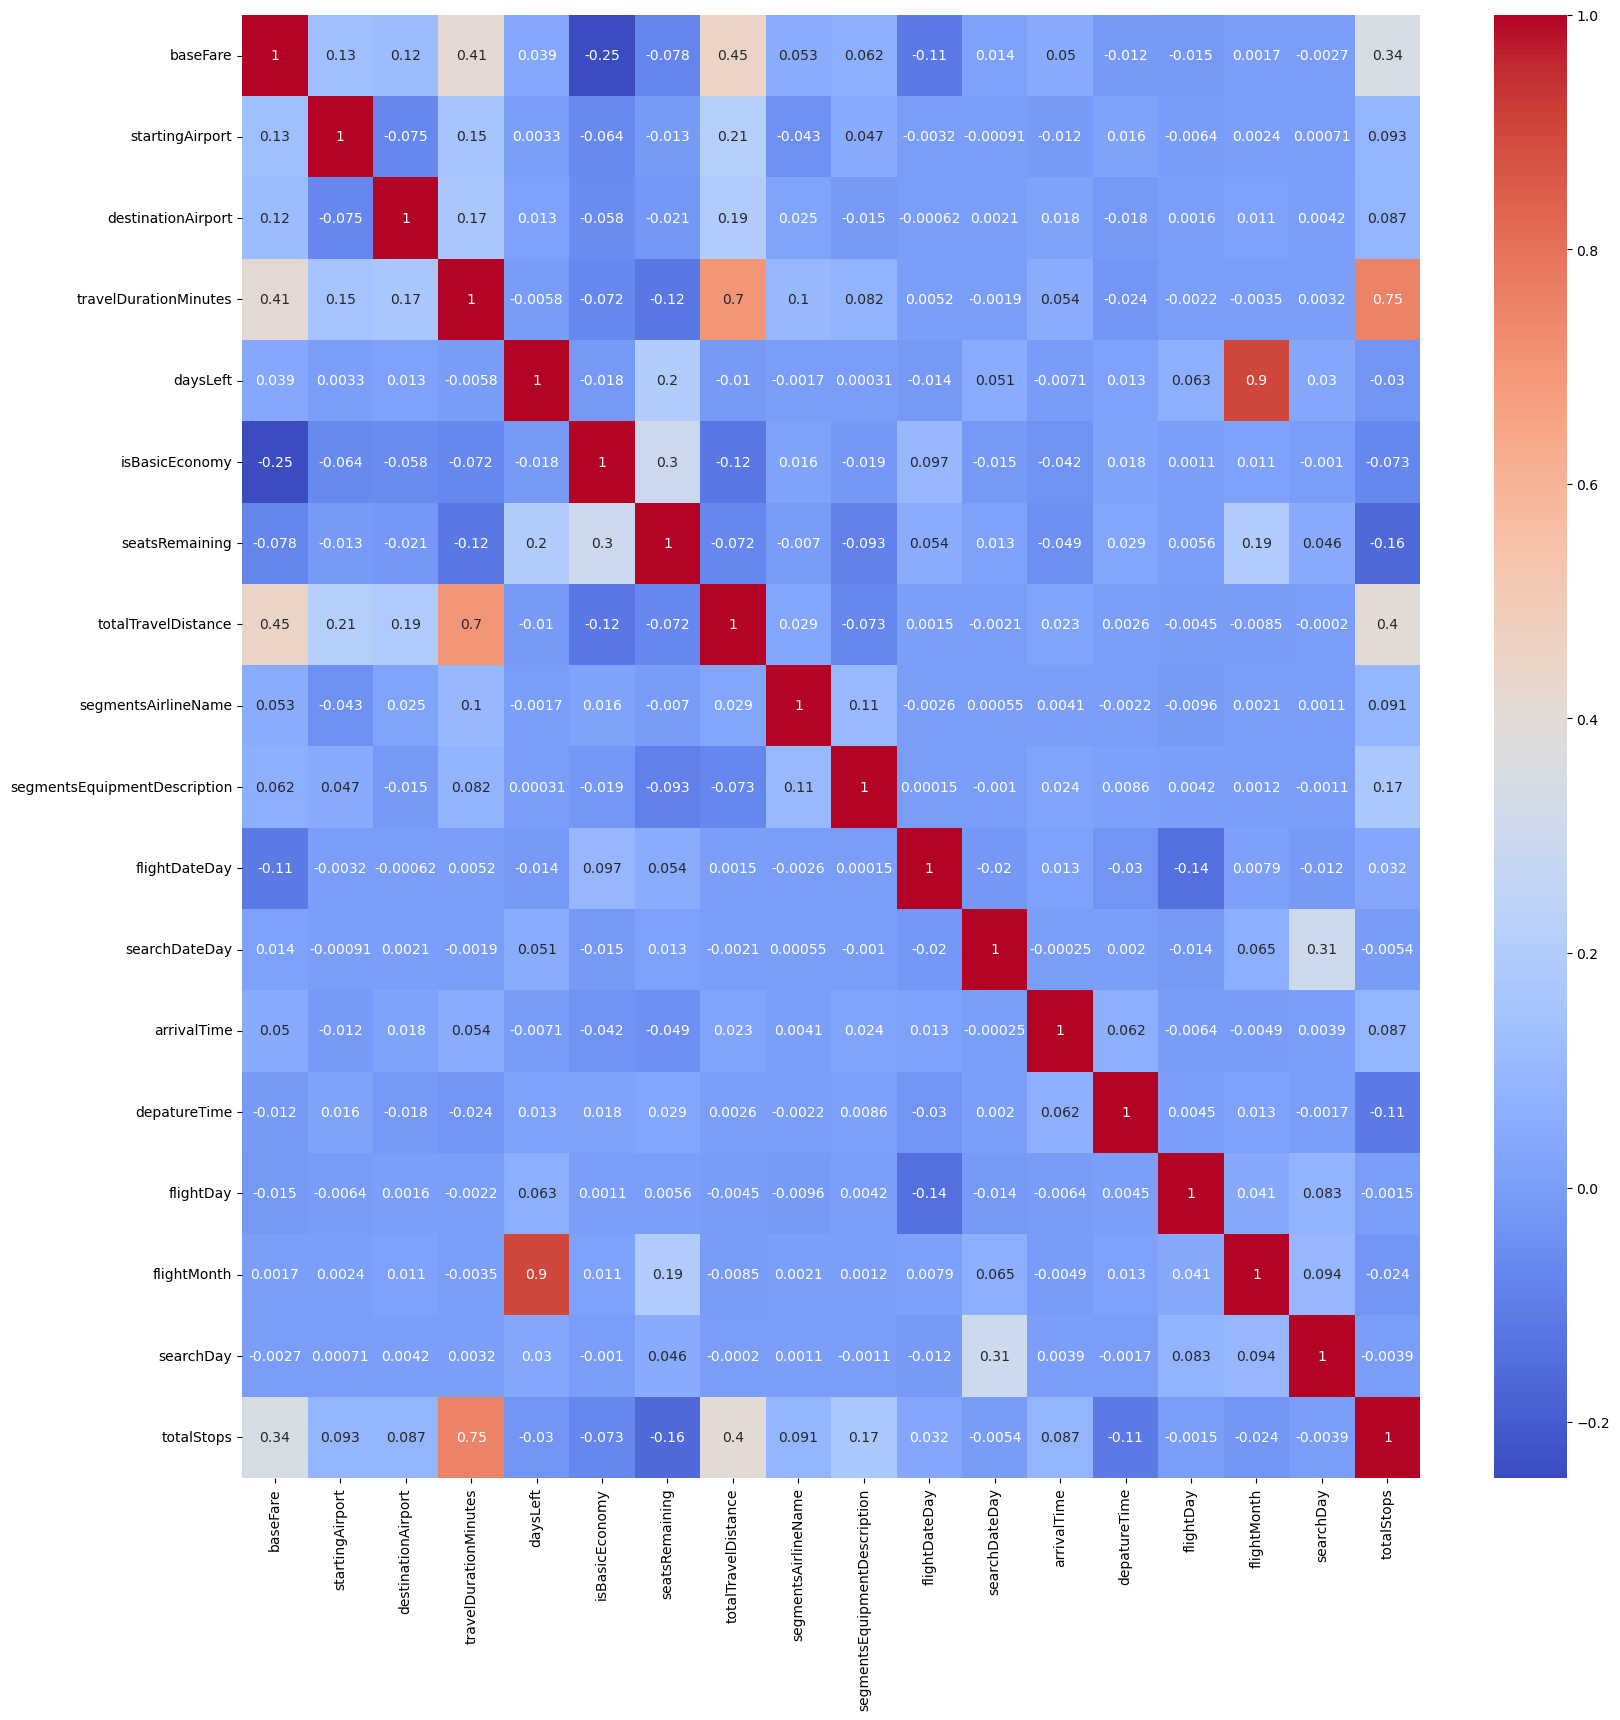

In [327]:
# Korrelationsmatrix erstellen
#corr_matrix = df.corr()

# Korrelationsmatrix anzeigen
#print(corr_matrix)

# Heatmap der Korrelationsmatrix erstellen
#plt.figure(figsize=(10, 8))
plt.figure(figsize=(19, 19))
#plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Plot anzeigen
plt.show()

Aussortieren von Feature, da die correlation kleiner als 0,001 ist.

Zwischen 'baseFare' und 'flightMonth' ist eine Korrelation von 0,00027.

Zwischen 'baseFare' und 'searchDay' ist eine Korrelation von 0,0014.

Beide Werte werden folgend nicht mehr betrachtet.

In [328]:
random_sample= random_sample.drop('flightMonth', axis=1)
random_sample= random_sample.drop('searchDay', axis=1)
print(random_sample.head(10))

   baseFare  startingAirport  destinationAirport  travelDurationMinutes  \
0    217.67                0                   1                    149   
1    217.67                0                   1                    150   
2    213.02                0                   1                    332   
3    213.02                0                   1                    398   
4    213.02                0                   1                    286   
5    213.02                0                   1                    438   
6    260.47                0                   1                    362   
7    258.60                0                   1                    677   
8    274.42                0                   1                    377   
9    274.42                0                   1                    385   

   daysLeft  isBasicEconomy  seatsRemaining  totalTravelDistance  \
0         1           False               9                947.0   
1         1           False           

In [316]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame called 'random_samples'

# Create a DataFrame to store the VIF values
vif = pd.DataFrame()
vif["Feature"] = random_sample.columns
vif["VIF"] = [variance_inflation_factor(random_sample.values, i) for i in range(random_sample.shape[1])]

# Display the VIF values
print(vif)



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
desired_columns = ['startingAirport', 'destinationAirport', 'fareBasisCode', 'travelDurationMinutes',  'isBasicEconomy', 'isRefundable', 
                   'isNonStop', 'baseFare', 'seatsRemaining', 'totalTravelDistance', 'segmentsAirlineName', 'segmentsEquipmentDescription','flightDate', 
                   'arrivalTime', 'depatureTime' ]

# creat new dataframe with selected columns
df_new = df[desired_columns].copy()
df=df_new

In [ ]:
df_new.info()
df_new.head(5)
df_new.isnull().sum()
df_new.shape

## 5. Exploratory Data Analysis 

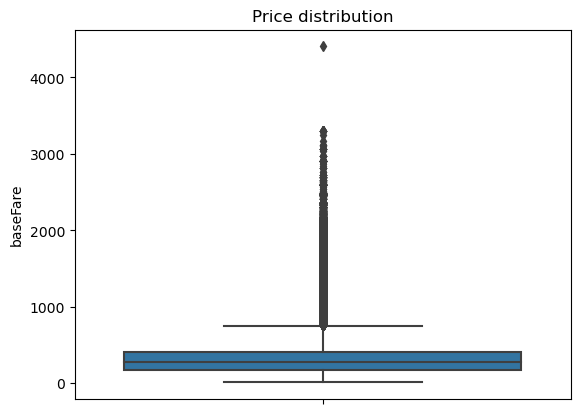

In [317]:
sns.boxplot(data=df, y = 'baseFare')
plt.title("Price distribution");

In [ ]:
# check correlation beetween 
# Select the desired rows
selected_rows = df[['baseFare', 'flightDate', 'searchDate', 'totalTravelDistance', 'travelDurationMinutes', 'daysLeft']]

# Calculate the correlation between the selected rows
correlation = selected_rows.corr()

# Print the correlation matrix
print(correlation)

In [ ]:
plt.style.use('dark_background')
sns.displot(x= 'baseFare', data=df);

In [ ]:
#df['arrivalTime'].astype(str).str[:2].value_counts().sort_values()
df['arrivalTime'].astype(int).value_counts().sort_index()


In [ ]:
df['arrivalTime'].astype(int).value_counts().sort_index().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of arrival time",
          fontsize='20');

In [ ]:
df['arrivalTime'].astype(int).value_counts().sort_index().plot(kind='line')
plt.xlabel('hours')
plt.ylabel('frequency')
plt.title("most hours of depurture time",
          fontsize='20');

In [ ]:
nonStop.head(5)

In [ ]:
nonStop = df.loc[df['isNonStop'] == True, ['segmentsAirlineName','baseFare']]
plt.figure(figsize=(10,10))
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)
#sns.lineplot(data=nonStop, x='segmentsAirlineName', y='baseFare', hue='segmentsAirlineName', color='blue')

plt.title("Airline Vs Price", fontsize=20)
# Create a legend
plt.legend(loc='right')
plt.show()

In [ ]:
# Wie viele verschiedene Arline typen gibt es?
df['segmentsAirlineName'].nunique()

df['isNonStop'].sum()

In [ ]:
nonStop['baseFare'].max()

In [ ]:
nonStop['baseFare'].min()

In [ ]:
# wie viele NonStop Flüge gibt es?
df['isNonStop'].sum()

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))

sns.countplot(x='destinationAirport', data=df, palette='Blues_r', order=df['destinationAirport'].value_counts().index, ax=ax[0]).set(title='Frequency of Destination Airport')
sns.countplot(x='startingAirport', data=df, palette='Blues_r', order=df['startingAirport'].value_counts().index, ax=ax[1]).set(title='Frequency Starting Airport')

plt.tight_layout()
plt.show()

In [ ]:
top20Routes = df['totalRoute'].value_counts()[:20]

plt.figure(figsize=(15,7))
chart=sns.countplot(y='totalRoute',data=df,palette='Blues', order = top20Routes.index)
plt.title("most 20 routes",
          fontsize='20')



In [ ]:
#plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='totalTravelDistance', y='baseFare', hue='isBasicEconomy', palette='hls')
plt.xlabel("Distance", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

In [ ]:
# Ermitteln Sie das Maximum aus Spalte A, wenn Spalte B True ist
max_value = df.loc[df['isBasicEconomy'] == True, 'baseFare'].max()

# Zeigen Sie das Ergebnis an
print('Der teuerste Economy FLug beträgt:' , max_value, 'USD.')

In [ ]:
from matplotlib.lines import Line2D
#plt.figure(figsize=(10,10))
plt.xlabel("Day of the week", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='flightDateDay', y='baseFare', color='blue')
sns.lineplot(data=df, x='searchDateDay', y='baseFare', color='pink')
plt.title("Effekt of the Days", fontsize=20)
# Create custom legend labels with name and color
custom_legend = [
    Line2D([0], [0], color='blue', lw=2, label='Flight Date'),
    Line2D([0], [0], color='pink', lw=2, label='Search Date')
]

plt.legend(handles=custom_legend, fontsize=12)

plt.show()

In [ ]:
plt.scatter(df["daysLeft"],
            df["baseFare"],s=30, color='blue')

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel("No of days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='daysLeft', y='baseFare', color='blue')
plt.title("Days left with Departure Vs Price", fontsize=20)
plt.show()

## Notizen
Interessante überlegungen zum Datensatz:
a) Ist der Preis je nach Fluggesellschaft unterschiedlich?
b) Wie wirkt sich der Preis aus, wenn die Tickets nur 1 oder 2 Tage vor dem Abflug gekauft werden?
c) Ändert sich der Ticketpreis je nach Abflugzeit und Ankunftszeit?
d) Wie unterscheidet sich der Ticketpreis zwischen Economy und Business Class?

# 6. Model Entwicklung

## Erstellung Datensets

In [ ]:
desired_columns = ['startingAirport', 'destinationAirport', 'travelDurationMinutes',  'isBasicEconomy', 'isRefundable', 
                   'isNonStop', 'baseFare']

# creat new dataframe with selected columns
df_new = df[desired_columns].copy()
df=df_new

## Spliting the Data

In [331]:
df = random_sample

In [133]:
X = df.drop(columns= "baseFare")
y = df["baseFare"]


In [134]:
from sklearn.model_selection import train_test_split
# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Berechnung des Baseline Mean Absolute Error (MAE) für die Spalte 'baseFare' im DataFrame 'df

Die Baseline-Methode wird verwendet, um eine Referenzleistung zu erhalten, mit der die Leistung unseres eigentlichen Modells vergliechen werden kann. 
In diesem Fall wird der Baseline-MAE berechnet, indem wir den Durchschnittswert ('y_mean') der 'baseFare'-Spalte nehmen und eine Vorhersage ('y_pred_mae') für alle Datenpunkte im DataFrame erstellen, die diesem Durchschnittswert entsprechen.

Der MAE gibt uns den durchschnittlichen absoluten Unterschied zwischen den tatsächlichen 'baseFare'-Werten und den Baseline-Vorhersagewerten an. 
Wenn unser Modell eine bessere Leistung erzielt, sollte der MAE niedriger sein als der Baseline-MAE.

Der Baseline-MAE ist nützlich, um eine erste Einschätzung der Vorhersageleistung eines Modells zu erhalten. 

Ein niedriger Baseline-MAE, könnte darauf hinweisen, dass die Daten nicht viele variierende Muster enthalten und ein einfacher Durchschnitt als Vorhersage ausreicht. 
In diesem Fall müsste möglicherweise ein komplexeres Modell entwickelt werden, um bessere Vorhersagen zu erzielen.

Ein hoher Baseline-MAE, deutet darauf hin, dass es Muster und Zusammenhänge in den Daten gibt, die von einem Modell erfasst werden könnten. .

Insgesamt dient der Baseline-MAE als Ausgangspunkt für unsere Modellbewertung und hilft uns dabei, unseren Fortschritt und den Mehrwert unseres Modells zu beurteilen.

In [347]:
df['baseFare'].min()

8.72

In [130]:
df= df_new

In [131]:
from sklearn.metrics import mean_absolute_error

y_mean = df['baseFare'].mean()
y_pred_mae = [y_mean] * len(df)
y_baseline = mean_absolute_error(df['baseFare'], y_pred_mae)
print("Baseline MAE:", round(y_baseline))


Baseline MAE: 146


# TODO bitte nochmal im internet recherchieren ob das richtig ist

Der MAE beträgt 146.
Das bedeutet, dass unsere Baseline-Vorhersagen im Durchschnitt um 146 Einheiten von den tatsächlichen Flugpreisen abweichen.

Um die Leistung unseres Modells zu bewerten, sollten wir sicherstellen, dass der MAE unseres Modells niedriger ist als dieser Baseline-MAE. Ein niedrigerer MAE zeigt an, dass unser Modell genauer ist und eine bessere Vorhersage der Flugpreise liefert.

Es ist wichtig anzumerken, dass die Flugpreise in den Trainingsdaten einen breiten Bereich von 8.72 USD bis 4407.44 USD abdecken. Dieser Bereich spiegelt die Varianz und die unterschiedlichen Preise wider, die in den Flugdaten vorkommen. Indem wir unseren MAE mit dieser Spannweite vergleichen, können wir die Leistung unseres Modells besser einschätzen und bewerten, wie gut es in der Lage ist, die Flugpreise vorherzusagen.

## Random Forrest

Der Random Forest Regressor komibiert mehrerer Decision Trees, um eine Vorhersage zu treffen. 
Im Training werden die  interen Parameter so optimiert, dass eine möglichst zutreffende Vorhersage erzielt werden kann.

Nachdem das Modell trainiert wurde, haben wir Vorhersagen auf dem Testdatensatz (X_test) gemacht. Hierbei haben wir die Methode "predict()" auf dem rf_model-Objekt aufgerufen und als Ergebnis die Vorhersagewerte "y_pred" erhalten. 

Zur Evaluierung des Modelles wird der Mean Squared Error (MSE) herangezogen. Diese misst die durchschnittliche quadratische Abweichung zwischen den tatsächlichen Testwerten (y_test) und den vorhergesagten Werten (y_pred). Ein niedrigerer MSE deutet auf eine bessere Vorhersageleistung hin.

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a random forest regressor object
rf_model = RandomForestRegressor()

# Train the random forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluation des Modells
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


MemoryError: Unable to allocate 7.88 GiB for an array with shape (3783, 558822) and data type float32

In unserem Fall beträgt der MSE 4471.650895294656. Dies bedeutet, dass die durchschnittliche quadratische Abweichung zwischen den tatsächlichen Flugpreisen und den Vorhersagen unseres Modells 4471.650895294656 beträgt.

# One-Hot-Encoding für die kategorischen Variablen durch
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

## Feature Importance

In [335]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the Random Forest regressor
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X_train, y_train)

# Get the feature importances
feature_importances = model.feature_importances_

# Create a dataframe to display the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print(importance_df)

                         Feature  Importance
6            totalTravelDistance    0.268980
7            segmentsAirlineName    0.154474
0                startingAirport    0.085634
1             destinationAirport    0.068460
11                   arrivalTime    0.065514
2          travelDurationMinutes    0.060020
8   segmentsEquipmentDescription    0.057937
3                       daysLeft    0.045475
4                 isBasicEconomy    0.043237
14                    totalStops    0.041967
9                  flightDateDay    0.033467
12                  depatureTime    0.028510
13                     flightDay    0.023708
5                 seatsRemaining    0.017160
10                 searchDateDay    0.005460


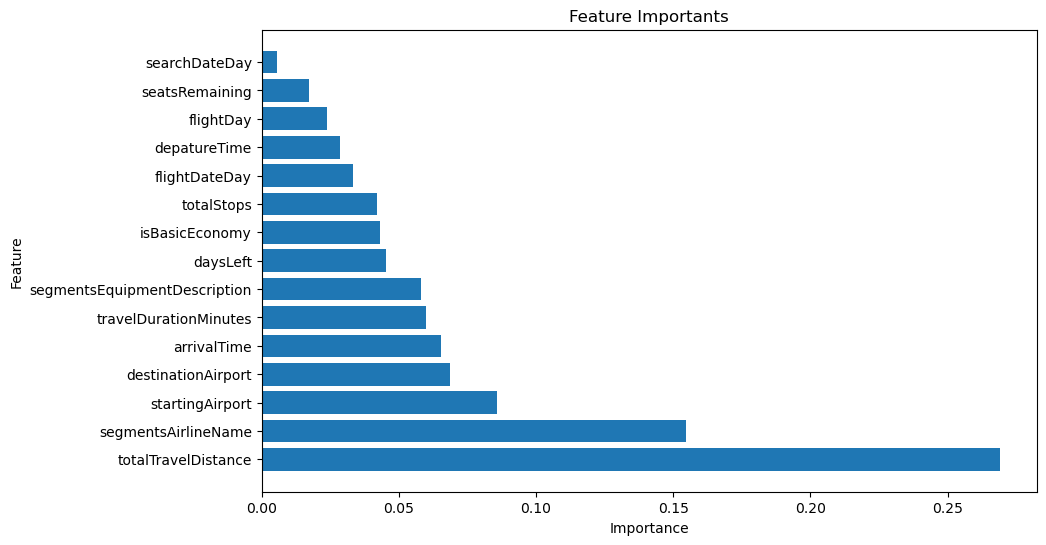

In [342]:

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importants')
plt.show()

## Lineare Regression

In [136]:
from sklearn.linear_model import LinearRegression

# Instanz eines linearen Regressionsmodells
model = LinearRegression()

# Training
model.fit(X_train, y_train)

# Vorhersagen für die Testdaten
y_pred = model.predict(X_test)

# Bewertung der Vorhersageleistung
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

MemoryError: Unable to allocate 15.0 GiB for an array with shape (3603, 558822) and data type float64

In [349]:
y_pred

array([355.00837114, 395.27002993, 332.31529696, ..., 387.43806892,
       401.53528188, 255.22384927])